
# Diabetes Visualization Exercises (Simple Version)

이 노트북은 다음 세 가지만 다룹니다.

1. **0 → NaN** 변환 후 **결측치 채우기(간단: 중앙값)**  
2. **각 컬럼 시각화** (숫자형: 히스토그램/막대)  
3. **`Outcome`과의 상관관계 히트맵**


In [115]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 1. 데이터 불러오기


- **파일 방식**: 같은 폴더에 `train.csv`를 두고 실행


In [51]:
df = pd.read_csv('train.csv')
df

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,TRAIN_000,4,103,60,33,192,24.0,0.966,33,0
1,TRAIN_001,10,133,68,0,0,27.0,0.245,36,0
2,TRAIN_002,4,112,78,40,0,39.4,0.236,38,0
3,TRAIN_003,1,119,88,41,170,45.3,0.507,26,0
4,TRAIN_004,1,114,66,36,200,38.1,0.289,21,0
...,...,...,...,...,...,...,...,...,...,...
647,TRAIN_647,1,91,64,24,0,29.2,0.192,21,0
648,TRAIN_648,10,122,68,0,0,31.2,0.258,41,0
649,TRAIN_649,8,84,74,31,0,38.3,0.457,39,0
650,TRAIN_650,2,81,72,15,76,30.1,0.547,25,0



## 2. 0 → NaN 변환 (결측치로 간주할 컬럼만)

다음 컬럼들은 **0이 실제로 측정 불가/누락**을 의미하는 경우가 많습니다.  
- `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`

이 컬럼들만 0을 NaN으로 바꾸고, 나머지는 그대로 둡니다.


In [52]:
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns] = df[columns].replace(0, np.nan)

In [53]:
df.isnull().sum()

ID                            0
Pregnancies                   0
Glucose                       4
BloodPressure                30
SkinThickness               195
Insulin                     318
BMI                           7
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


## 3. 간단한 결측치 채우기 (중앙값)

각 컬럼의 **중앙값**으로 NaN을 채웁니다.


In [62]:
for i in columns:
    print(f'{i:<13} mean : {df[i].mean():<6.2f}  median : {df[i].median():.2f}')

Glucose       mean : 121.69  median : 117.50
BloodPressure mean : 72.22   median : 72.00
SkinThickness mean : 29.16   median : 29.00
Insulin       mean : 157.88  median : 125.00
BMI           mean : 32.29   median : 32.00


In [63]:
for i in columns:
    df[i] = df[i].fillna(df[i].median())

In [64]:
df.isnull().sum()

ID                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## 4. 각 컬럼 시각화

- **숫자형**: 값의 종류가 적으면(예: Outcome=0/1) → 막대 그래프  
               값이 많으면 → 히스토그램  
- **문자형/범주형**: 빈도 막대 그래프


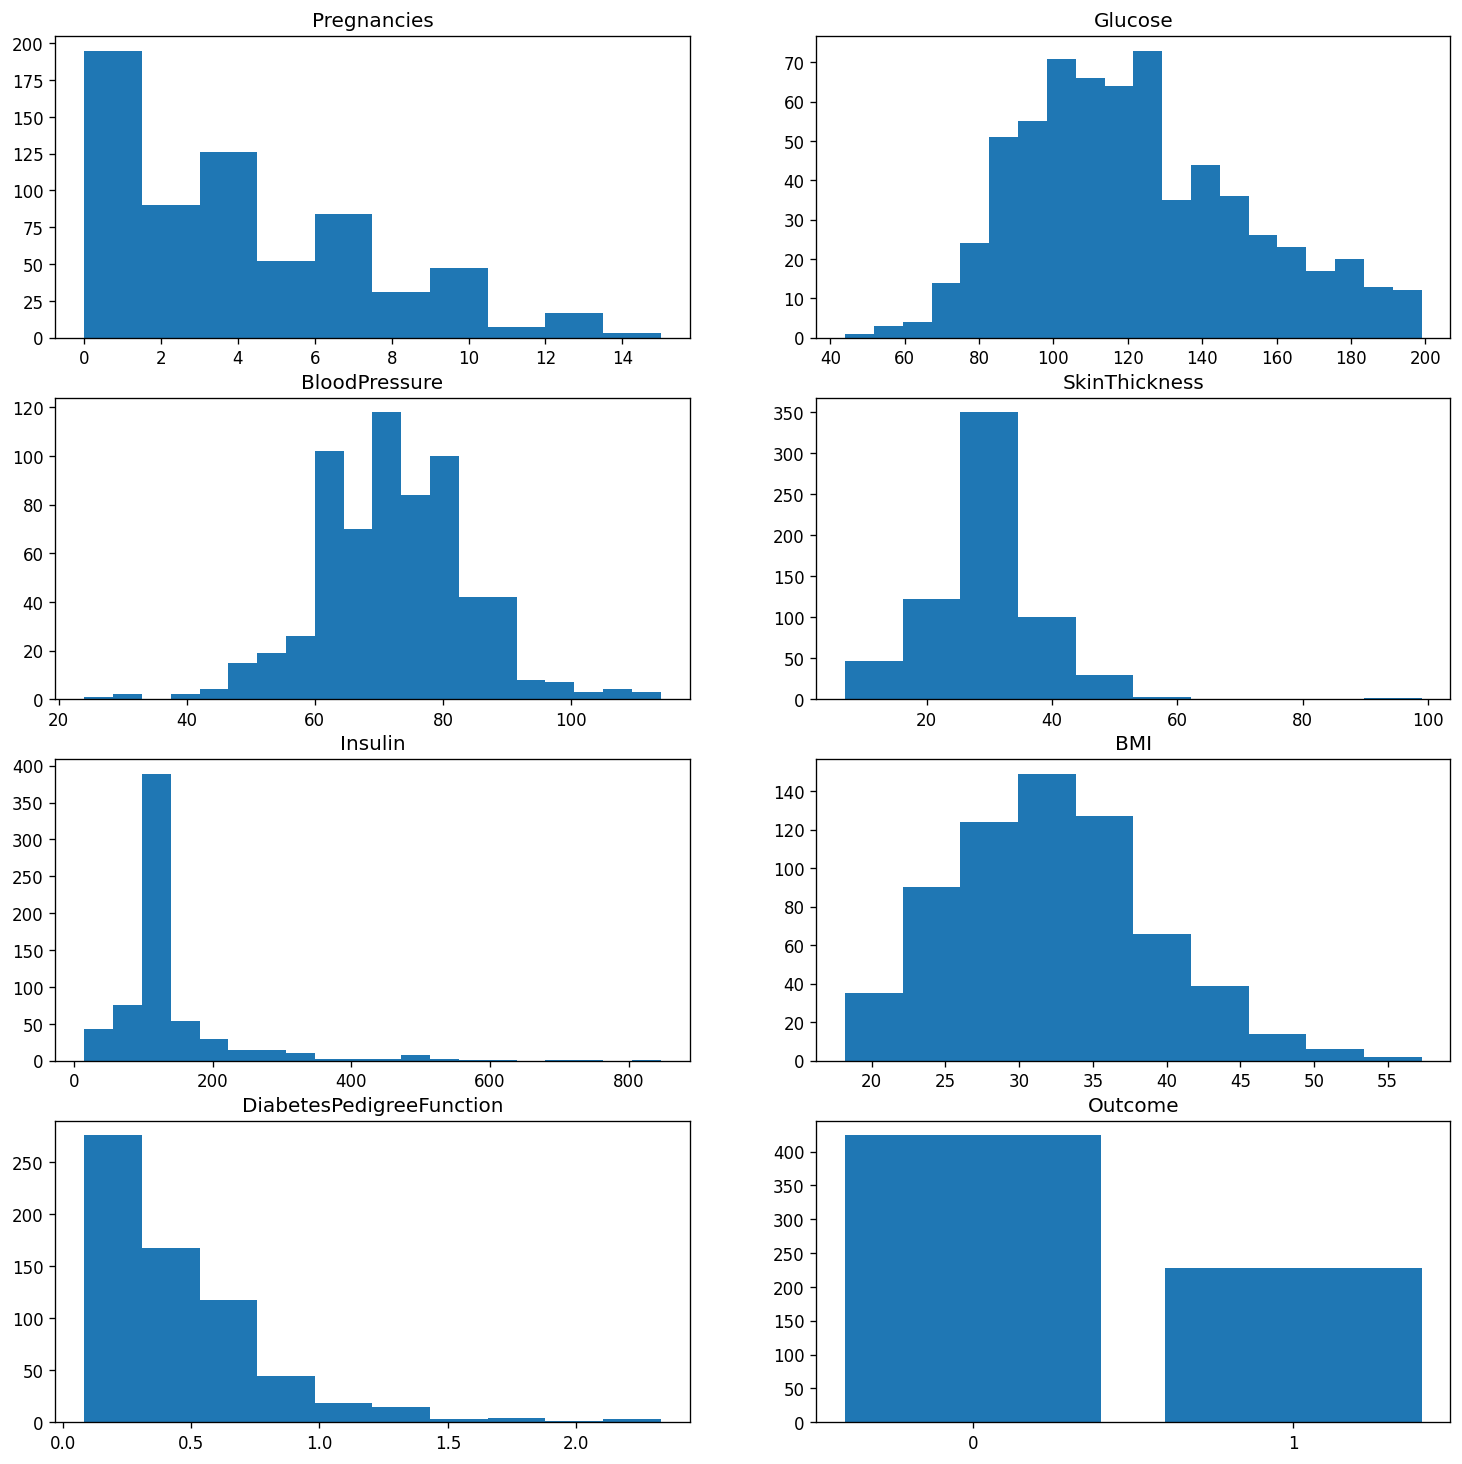

In [106]:
fig, axs = plt.subplots(4, 2, figsize=(15,15), dpi=120)

axs[0, 0].hist(df['Pregnancies'])
axs[0, 0].set_title('Pregnancies')

axs[0, 1].hist(df['Glucose'], bins=20)
axs[0, 1].set_title('Glucose')

axs[1, 0].hist(df['BloodPressure'], bins=20)
axs[1, 0].set_title('BloodPressure')

axs[1, 1].hist(df['SkinThickness'])
axs[1, 1].set_title('SkinThickness')

axs[2, 0].hist(df['Insulin'], bins=20)
axs[2, 0].set_title('Insulin')

axs[2, 1].hist(df['BMI'])
axs[2, 1].set_title('BMI')

axs[3, 0].hist(df['DiabetesPedigreeFunction'])
axs[3, 0].set_title('DiabetesPedigreeFunction')

axs[3, 1].bar(df['Outcome'].value_counts().index, df['Outcome'].value_counts().values)
axs[3, 1].set_title('Outcome')
axs[3, 1].set_xticks([0,1])

plt.show()


## 5. `Outcome`과의 상관관계 히트맵

- 수치형 컬럼만 상관계수를 계산합니다.
- `Outcome`과의 **상관 절댓값**이 큰 순서로 정렬해서 표시합니다.


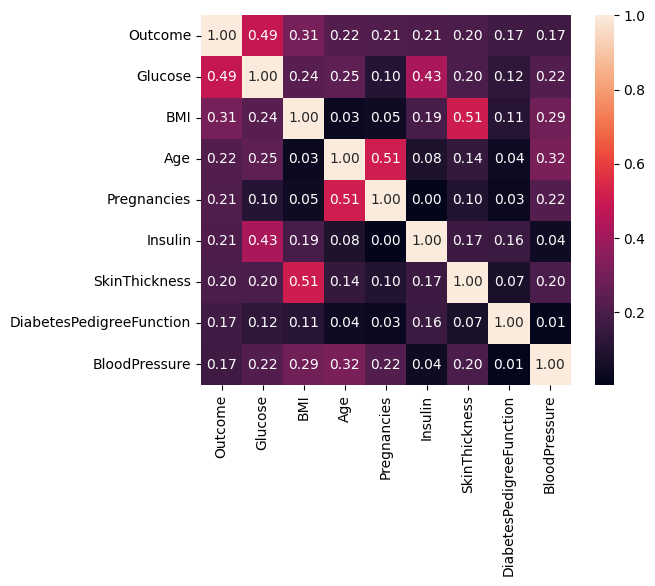

In [134]:
corr = df.select_dtypes('number').corr()
sorted_corr = corr.abs().sort_values('Outcome', ascending=False)

sns.heatmap(sorted_corr.loc[sorted_corr.index, sorted_corr.index], annot=True, fmt='.2f', square=True)
plt.show()


---

###  체크 포인트
- 0 → NaN 변환 대상 컬럼을 **명확히 지정**했나요?
- 중앙값으로 채우는 것이 합리적인가요? (다른 전략도 비교해 볼 수 있습니다)
- `Outcome`과 상관이 큰 컬럼은 무엇인가요? **해석**을 적어 보세요.


- 네
- 평균, 중앙값이 비슷하고 튀는 값이 있는 경우가 있어, 중앙값을 넣는것이 합리적이라고 생각합니다
- Outcome과 상관이 큰 컬럼은 Glucose이고, 혈당이 높을수록 당뇨 발병 가능성이 크다고 해석할 수 있습니다.
